/tmp/ipython-input-4-4143449573.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates_pg = pd.date_range('1961-01', periods=len(pgret), freq='M')


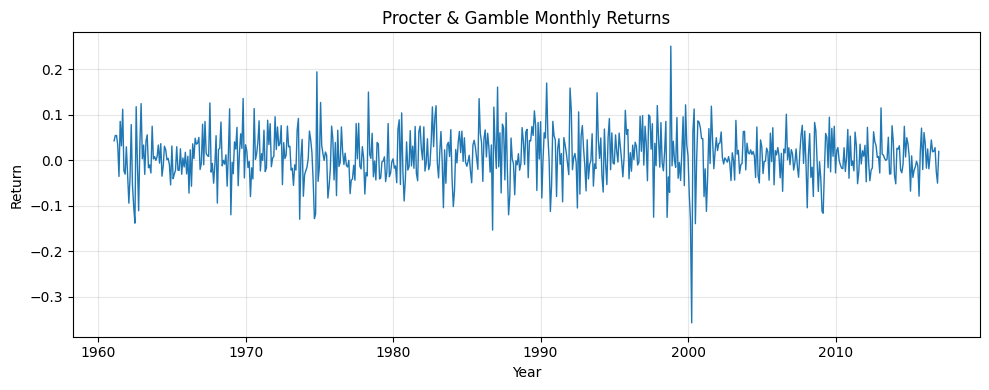

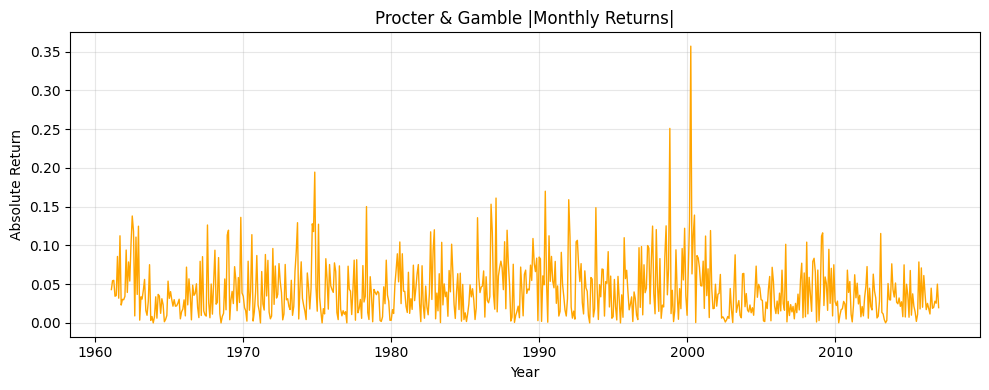

<Figure size 800x400 with 0 Axes>

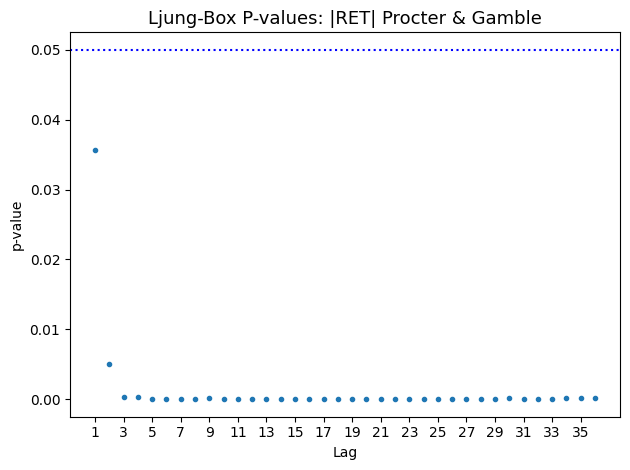

/tmp/ipython-input-4-4143449573.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dax = yf.download("^GDAXI", start="1991-01-01", progress=False)['Close']


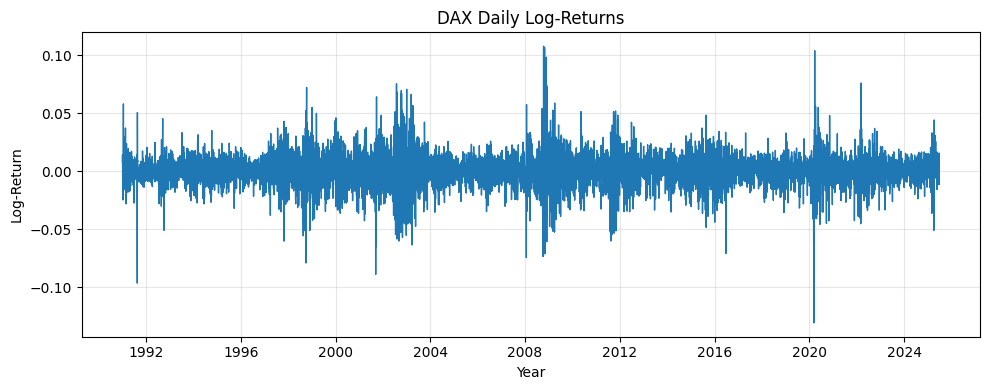

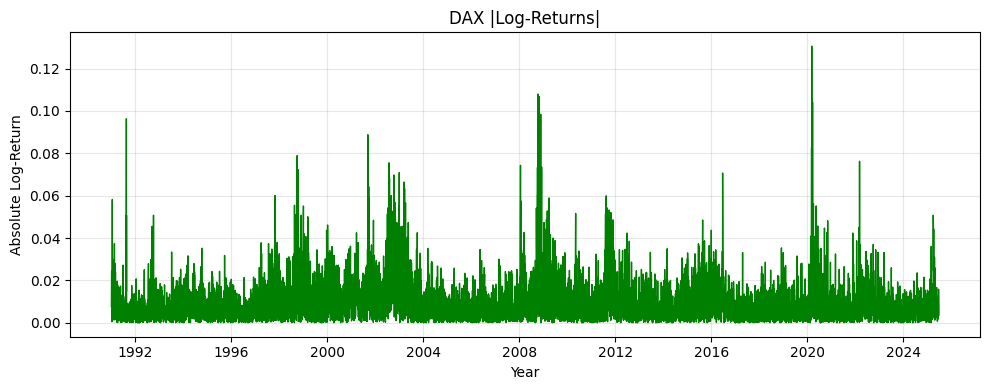

<Figure size 800x400 with 0 Axes>

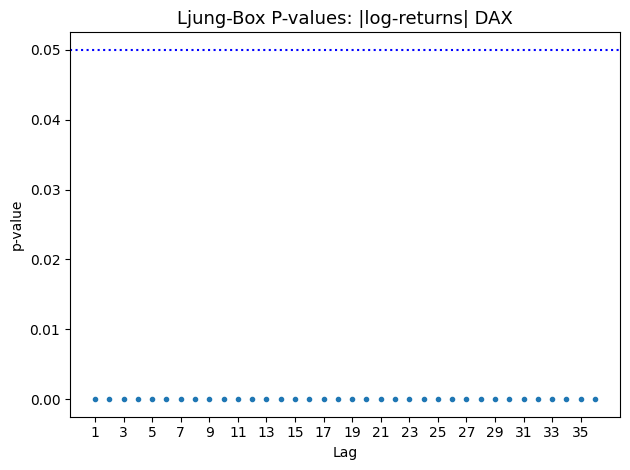

In [4]:
# !pip install PythonTsa yfinance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PythonTsa.LjungBoxtest import plot_LB_pvalue
import yfinance as yf

# --- Procter & Gamble monthly returns (RET column) ---
pgret_url = "https://raw.githubusercontent.com/QuantLet/pyTSA/40314998b5b881d3497f2da2d3f82d625b657549/pyTSA_ReturnsPG/monthly%20returns%20of%20Procter%20n%20Gamble%20stock%20n%203%20market%20indexes%201961%20to%202016.csv"
pgdf = pd.read_csv(pgret_url)
pgret = pgdf['RET']
dates_pg = pd.date_range('1961-01', periods=len(pgret), freq='M')
pgret.index = dates_pg

# Plot P&G returns and |returns|
plt.figure(figsize=(10,4))
plt.plot(pgret, label="RET (P&G)", lw=1)
plt.title("Procter & Gamble Monthly Returns")
plt.xlabel("Year")
plt.ylabel("Return")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("pgret_timeseries_Prob67.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(abs(pgret), label="|RET| (P&G)", lw=1, color='orange')
plt.title("Procter & Gamble |Monthly Returns|")
plt.xlabel("Year")
plt.ylabel("Absolute Return")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("abspgret_timeseries_Prob67.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

# Ljung-Box for |RET|
plt.figure(figsize=(8, 4))
plot_LB_pvalue(abs(pgret), noestimatedcoef=0, nolags=36)
plt.title("Ljung-Box P-values: |RET| Procter & Gamble", fontsize=13)
plt.tight_layout()
plt.savefig("PvLBabspgProb67.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

# --- DAX log-returns (from Yahoo Finance) ---
dax = yf.download("^GDAXI", start="1991-01-01", progress=False)['Close']
dax = dax.dropna()
logret = np.log(dax / dax.shift(1)).dropna()
logret.index = pd.to_datetime(logret.index)

# Plot DAX log-returns and |log-returns|
plt.figure(figsize=(10,4))
plt.plot(logret, label="log-returns (DAX)", lw=1)
plt.title("DAX Daily Log-Returns")
plt.xlabel("Year")
plt.ylabel("Log-Return")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("dax_logret_timeseries_Prob67.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(abs(logret), label="|log-returns| (DAX)", lw=1, color='green')
plt.title("DAX |Log-Returns|")
plt.xlabel("Year")
plt.ylabel("Absolute Log-Return")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("abslogret_timeseries_Prob67.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

# Ljung-Box for |log-returns|
plt.figure(figsize=(8, 4))
plot_LB_pvalue(abs(logret), noestimatedcoef=0, nolags=36)
plt.title("Ljung-Box P-values: |log-returns| DAX", fontsize=13)
plt.tight_layout()
plt.savefig("PvLBabslogretProb67.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()
